## Credit Card Fraud - Oversampling and undersampling

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis -EDA </a></li>
<li><a href="#under">RandomUnderSampler & SMOTE combination</a></li>
<li><a href="#over">SMOTE</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, So we will use two methods to support this imbalanced data using SMOTE this model is used to maximize the minority data to be balanced with the majority data using the k-neighbor model so which uses the nearest points to make a new point among them
and randomundersampler This way of the model is used to minimize the number of samples in the majority class to be matched with the minority.

This is an into to a Precision and recall :
* Precision = True Positives / (True Positives + False Positives)<br>
 A high precision score means that the classifier is making very few false positive predictions, which is good if we want to minimize false alarms.<br>
* Recall = True Positives / (True Positives + False Negatives)<br>
A high recall score means that the classifier is correctly identifying a large fraction of the positive instances in the dataset, which is good if we want to minimize false negatives.

<a id='eda'></a>
## EDA

In [1]:
# first the EDA we will import the needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Normlize the Amount column
min_max_scaler = preprocessing.MinMaxScaler()
df["Amount"] = min_max_scaler.fit_transform(np.array(df["Amount"]).reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [4]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Counter({0: 284315, 1: 492})


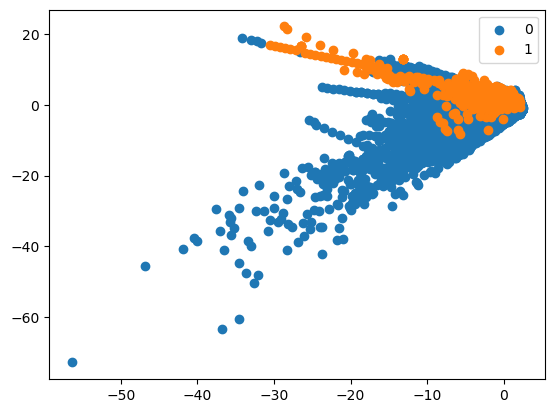

In [5]:
# draw the distrubtion of y by using any of our features
from collections import Counter

counter = Counter(df["Class"])

for label, _ in counter.items():
    row_ix = np.where(df["Class"] == label)[0]
    plt.scatter(df.iloc[row_ix,1], df.iloc[row_ix,2], label=str(label))
print(Counter(df["Class"]))
plt.legend()
plt.show()

The above plot is clarify the distribution of y in column V1 and V2.

### Imbalance Dataset using by RandomUnderSampler & SMOTE

In [6]:
# import some important laibraies
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

In [7]:
# here is the x and y that we will use to predict our models after apply overfitting & underfitting models
X=df.drop("Class",axis=1).values
y=df["Class"].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=5)

In [8]:
# this LogisticRegression without using SMOTE
linear=LogisticRegression(max_iter=200)
linear.fit(x_train,y_train)

y_train_pred=linear.predict(x_train)
print("linear Report for training : \n",classification_report(y_train,y_train_pred))

print("*"*50)

y_test_pred_LR=linear.predict(x_test)
print("linear Report for testing : \n",classification_report(y_test,y_test_pred_LR))

linear Report for training : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.79      0.61      0.69       344

    accuracy                           1.00    199364
   macro avg       0.90      0.80      0.84    199364
weighted avg       1.00      1.00      1.00    199364

**************************************************
linear Report for testing : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.59      0.69       148

    accuracy                           1.00     85443
   macro avg       0.91      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443



<a id='under'></a>
## First using RandomUnderSampler & SMOTE combinations

In [9]:
# define the x(Features) the y(Label) from the data 
X1=df.drop("Class",axis=1).values
y1=df["Class"].values

over :  SMOTE(sampling_strategy=0.1)
steps :  [('o', SMOTE(sampling_strategy=0.1)), ('u', RandomUnderSampler(sampling_strategy=0.5))]
pipeline :  Pipeline(steps=[('o', SMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.5))])
Counter({0: 56862, 1: 28431})


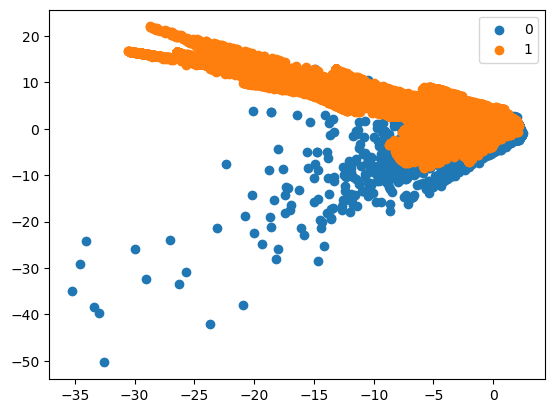

In [10]:
# model over sample SMOTE & under sample RandomUnderSampler 
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
print("over : ",over)

steps = [('o', over), ('u', under)]
print("steps : ",steps)

# use pipeline to apply the previous steps
pipeline = Pipeline(steps=steps)
print("pipeline : ",pipeline)

# transform the dataset
X1, y1 = pipeline.fit_resample(X1, y1)

# summarize the new class distribution
counter = Counter(y1)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y1 == label)[0]
    plt.scatter(X1[row_ix, 1], X1[row_ix, 2], label=str(label))
    
plt.legend()
plt.show()

In the above model we using the combinatoin between SMOTE and RandomUnderSampler to make the balance beteween the data and we use sampling_strategy to be make ratio 2:1 maximize the minority data to be 50% of the majority data and minimize the majority), The final output would be class 0=56,862 & class 1=28,431

## LogisticRegression by SMOTE & RandomUnderSampler

In [11]:
x1_train , x1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=.2,random_state=1)

In [12]:
linear=LogisticRegression(C=.01,max_iter=200)
linear.fit(x1_train,y1_train)

y1_train_pred=linear.predict(x_train)
print("linear Report for training : \n",classification_report(y_train,y1_train_pred))

print("*"*50)

y1_test_pred_LR=linear.predict(x_test)
print("linear Report for testing : \n",classification_report(y_test,y1_test_pred_LR))

linear Report for training : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199020
           1       0.09      0.90      0.16       344

    accuracy                           0.98    199364
   macro avg       0.54      0.94      0.58    199364
weighted avg       1.00      0.98      0.99    199364

**************************************************
linear Report for testing : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.09      0.89      0.17       148

    accuracy                           0.98     85443
   macro avg       0.55      0.94      0.58     85443
weighted avg       1.00      0.98      0.99     85443



This model focused on the recall score = 88% in the test score otherwise the recall is equal 59% in the previous model without applying SMOTE and RandomUnderSampler.

### DecisionTreeClassifier by SMOTE & RandomUnderSampler

In [13]:
DT=DecisionTreeClassifier()
DT.fit(x1_train,y1_train)

y1_train_pred=DT.predict(x_train)
print("DecisionTreeClassifier Report for training : \n",classification_report(y_train,y1_train_pred))

print("*"*50)

y1_test_pred_DT=DT.predict(x_test)
print("DecisionTreeClassifier Report for testing : \n",classification_report(y_test,y1_test_pred_DT))

DecisionTreeClassifier Report for training : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199020
           1       0.21      0.99      0.35       344

    accuracy                           0.99    199364
   macro avg       0.61      0.99      0.67    199364
weighted avg       1.00      0.99      1.00    199364

**************************************************
DecisionTreeClassifier Report for testing : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.22      0.99      0.36       148

    accuracy                           0.99     85443
   macro avg       0.61      0.99      0.68     85443
weighted avg       1.00      0.99      1.00     85443



## RandomForestClassifier -  SMOTE & RandomUnderSampler

In [14]:
RF=RandomForestClassifier()
RF.fit(x1_train,y1_train)

y1_train_pred=RF.predict(x_train)
print("DecisionTreeClassifier Report for training : \n",classification_report(y_train,y1_train_pred))

print("*"*50)

y1_test_pred_RF=RF.predict(x_test)
print("DecisionTreeClassifier Report for testing : \n",classification_report(y_test,y1_test_pred_RF))

DecisionTreeClassifier Report for training : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.82      0.99      0.90       344

    accuracy                           1.00    199364
   macro avg       0.91      1.00      0.95    199364
weighted avg       1.00      1.00      1.00    199364

**************************************************
DecisionTreeClassifier Report for testing : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.99      0.89       148

    accuracy                           1.00     85443
   macro avg       0.90      1.00      0.94     85443
weighted avg       1.00      1.00      1.00     85443



<a id='over'></a>
## SMOTE

In [15]:
# prepare new x and y
X_somte=df.drop("Class",axis=1).values
y_somte=df["Class"].values

In [16]:
# transform the dataset
oversample = SMOTE()
X_somte, y_somte = oversample.fit_resample(X_somte, y_somte)

In [17]:
# summarize the new class distribution
counter = Counter(y_somte)
print(counter)

Counter({0: 284315, 1: 284315})


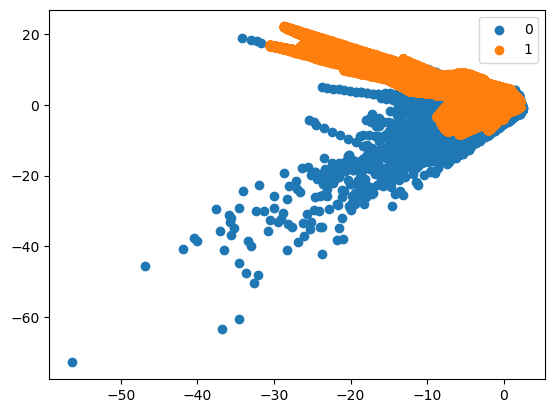

In [18]:
# scatter plot after SMOTE
for label, _ in counter.items():
    row_ix = np.where(y_somte == label)[0]
    plt.scatter(X_somte[row_ix, 1], X_somte[row_ix, 2], label=str(label))
plt.legend()
plt.show()

The above plot is clarify the distribution of y in column V1 and V2 after SMOTE

In [19]:
x_smote_train ,x_smote_test , y_smote_train , y_smote_test = train_test_split(X_somte, y_somte,test_size=.3,random_state=2)

## LogisticRegression SOMOTE

In [20]:
linear=LogisticRegression(max_iter=200)
linear.fit(x_smote_train,y_smote_train)

y_smote_train_pred=linear.predict(x_train)
print("linear Report for training : \n",classification_report(y_train,y_smote_train_pred))

print("*"*50)

y_smote_test_pred_LR=linear.predict(x_test)
print("linear Report for testing : \n",classification_report(y_test,y_smote_test_pred_LR))

linear Report for training : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199020
           1       0.07      0.90      0.13       344

    accuracy                           0.98    199364
   macro avg       0.53      0.94      0.56    199364
weighted avg       1.00      0.98      0.99    199364

**************************************************
linear Report for testing : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.89      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



## DecisionTreeClassifier SMOTE

In [21]:
DT=DecisionTreeClassifier()
DT.fit(x_smote_train,y_smote_train)

y_smote_train_pred=DT.predict(x_train)
print("DecisionTreeClassifier Report for training : \n",classification_report(y_train,y_smote_train_pred))

print("*"*50)

y_smote_test_pred_DT=DT.predict(x_test)

print("DecisionTreeClassifier Report for testing : \n",classification_report(y_test,y_smote_test_pred_DT))

DecisionTreeClassifier Report for training : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.72      1.00      0.84       344

    accuracy                           1.00    199364
   macro avg       0.86      1.00      0.92    199364
weighted avg       1.00      1.00      1.00    199364

**************************************************
DecisionTreeClassifier Report for testing : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      1.00      0.82       148

    accuracy                           1.00     85443
   macro avg       0.85      1.00      0.91     85443
weighted avg       1.00      1.00      1.00     85443



<a id='conclusions'></a>
## Conclusions

In [22]:
pd.DataFrame({"Model Name":["LR","DT","RF"],
              "racall RUS&Smote":[recall_score(y_test,y1_test_pred_LR),recall_score(y_test,y1_test_pred_DT),recall_score(y_test,y1_test_pred_RF)],
              "precision RUS&Smote":[precision_score(y_test,y1_test_pred_LR),precision_score(y_test,y1_test_pred_DT),precision_score(y_test,y1_test_pred_RF)],
              "racall SMOTE":[recall_score(y_test,y_smote_test_pred_LR),recall_score(y_test,y_smote_test_pred_DT),"-"],
              "precision SMOTE":[precision_score(y_test,y_smote_test_pred_LR),precision_score(y_test,y_smote_test_pred_DT),"-"]
             }
            )


,Model Name,racall RUS&Smote,precision RUS&Smote,racall SMOTE,precision SMOTE
0,LR,0.885135,0.093438,0.891892,0.073702
1,DT,0.986486,0.222901,1.0,0.701422
2,RF,0.993243,0.798913,-,-
